# **S&P 500 Analysis**
*By Justin Kim*  
[GitHub Repository](https://github.com/iluvcoding123/sp500_analysis)


## Introduction
The S&P 500 is a stock market index comprised of the 500 largest publicly traded companies in the U.S. Netflix, Amazon, Coca-Cola, and Apple are but a few notable names among its top performers. It serves as a key benchmark for the performance of the U.S. stock market and overall economy. By tracking the performance of 500 leading companies, it provides valuable insights into economic trends and market conditions. In this project, we will aim to reveal such insights by using data analysis techniques in Python.

## 1. Data Overview
We will be using three primary datasets sourced from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks). 
1. `sp500_companies.csv`  
    Contains detailed information about each S&P 500 company including symbol, industry, market cap, weight, etc.

2. `sp500_index.csv`  
    Contains historical daily values of the S&P 500 index
    
3. `sp500_stocks.csv`  
    Contains historical daily open, close, and other related metrics for each company. 

### 1.1 Importing Data
First, let's import the datasets into pandas DataFrames so we can analyze them throughout this project. Note: The `sp500_stocks.csv` file will be accessed externally through Google Drive due to its large file size (~200 MB).

In [160]:
import pandas as pd
import gdown
import os

# Download 'sp500_stocks.csv' from Google Drive
url = 'https://drive.google.com/uc?id=1ODTONeSfNwIa7ADrFSdTqiJHWHBiMV5M'
file_path = 'sp500_stocks.csv'
# Skip download if file already exists in path
if not os.path.exists(file_path):
    print("Downloading sp500_stocks.csv from Google Drive...")
    gdown.download(url, file_path, quiet=False)
else:
    print("sp500_stocks.csv download skipped.")

# Load the CSV files into DataFrames
companies = pd.read_csv('sp500_companies.csv')
index = pd.read_csv('sp500_index.csv')
stocks = pd.read_csv('sp500_stocks.csv')

sp500_stocks.csv download skipped.


## 2 Exploratory Data Analysis
Now that our data is loaded into the `companies`, `index`, and `stocks` DataFrames, we can perform exploratory data analysis to gain a better understanding of the data's characteristics.

### 2.1 Data Overview and Structure

In [161]:
# Print a summary of each DataFrame's structure
print('companies info:')
print(companies.info())

print('\nindex info:')
print(index.info())

print('\nstocks info:')
print(stocks.info())

companies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        501 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    498 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503

### 2.2 Summary Statistics

In [162]:
# Print summary statistics for each DataFrame
print('companies summary statistics:')
print(companies.describe())

print('\nindex summary statistics:')
print(index.describe())

print('\nstocks summary statistics:')
print(stocks.describe())

companies summary statistics:
       Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count    503.000000  5.030000e+02  4.740000e+02     501.000000   
mean     220.833926  1.039559e+11  6.799068e+09       0.057695   
std      507.631537  3.012797e+11  1.486008e+10       0.142051   
min        8.560000  6.334528e+09 -4.107000e+09      -0.573000   
25%       69.830000  1.917211e+10  1.585225e+09      -0.001000   
50%      123.800000  3.671813e+10  2.880500e+09       0.047000   
75%      234.515000  7.657803e+10  5.874562e+09       0.096000   
max     9425.370000  3.288951e+12  1.317810e+11       1.430000   

       Fulltimeemployees      Weight  
count       4.980000e+02  503.000000  
mean        5.815182e+04    0.001988  
std         1.390450e+05    0.005762  
min         2.800000e+01    0.000121  
25%         1.017825e+04    0.000367  
50%         2.137450e+04    0.000702  
75%         5.548300e+04    0.001464  
max         2.100000e+06    0.062899  

index summary statistic

### 2.3 Missing Data

In [163]:
# Check for number of missing values in each DataFrame
print("companies missing values:")
print(companies.isnull().sum())

print("\nindex missing values:")
print(index.isnull().sum())

print("\nstocks missing values:")
print(stocks.isnull().sum())

companies missing values:
Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           2
City                    0
State                  20
Country                 0
Fulltimeemployees       5
Longbusinesssummary     0
Weight                  0
dtype: int64

index missing values:
Date      0
S&P500    0
dtype: int64

stocks missing values:
Date             0
Symbol           0
Adj Close    94879
Close        94879
High         94879
Low          94879
Open         94879
Volume       94879
dtype: int64


From the `companies` table, we have a few missing values: **29** from `Ebitda`, **20** in `State`, and **5** in `Fulltimeemployees`. Additionally, we can observe a non-negligible amount of data is missing from the `stocks` table. **94,879** values are missing from each of the `Adj Close`, `Close`, `High`, `Low`, `Open`, and `Volume` columns. Let's calculate exactly how much is missing relative to the total for this table.

In [164]:
# Calculate and print the percentage of values that are missing for each column in companies
missing_percentage = stocks.isnull().sum() / len(stocks) * 100
print('Missing value proportions for companies:')
print(missing_percentage)

Missing value proportions for companies:
Date         0.000000
Symbol       0.000000
Adj Close    5.098007
Close        5.098007
High         5.098007
Low          5.098007
Open         5.098007
Volume       5.098007
dtype: float64


Interesting... we calculated **5.1%** of values are missing from each of those columns. We'll have to keep that in mind going forward. For now, let's continue exploring the data. It's time for some visualizations. 

### 2.4 Data Visualization

Let's take a look at the `companies` table first. In recent years, the stocks of tech giants like Apple, Google, Microsoft, and Meta have seen impressive growth, reflecting the dominance of the technology sector. To better understand how the S&P 500 is represented across various sectors, we can examine the count of companies by sector within the index.

                        Number of Companies  % of Index
Sector                                                 
Technology                               80       15.90
Industrials                              70       13.92
Financial Services                       66       13.12
Healthcare                               64       12.72
Consumer Cyclical                        57       11.33
Consumer Defensive                       37        7.36
Utilities                                32        6.36
Real Estate                              31        6.16
Communication Services                   22        4.37
Energy                                   22        4.37
Basic Materials                          22        4.37


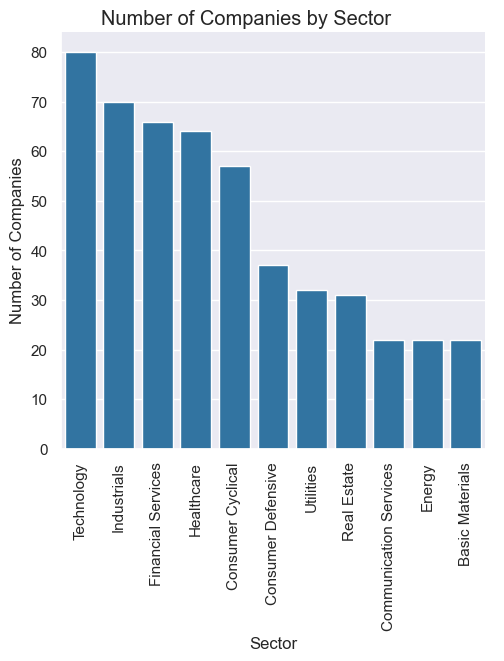

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and context
sns.set_style('darkgrid')
sns.set_context('notebook')

# Count plot for 'Sector' in companies
# Order by counts descending and print
sector_counts = companies['Sector'].value_counts()
sector_percentages = companies['Sector'].value_counts(normalize=True) * 100
sector_summary = pd.DataFrame({'Number of Companies': sector_counts, 
                               '% of Index': sector_percentages.round(2)})
print(sector_summary)


# Count plot for 'Sector' in companies
sector_plot = sns.catplot(x='Sector', kind='count', data=companies, 
                          order=sector_counts.index)
sector_plot.fig.suptitle('Number of Companies by Sector', y=1.01)
sector_plot.set_axis_labels('Sector', 'Number of Companies')
plt.xticks(rotation=90)
plt.show()

As expected, the **Technology** sector makes up the largest proportion of the S&P 500. It contributes **80** companies, representing **15.9%** of the index.  

A primary metric that determines whether a company is included in the S&P 500 is its **market capitalization**. Let's further explore the `Sector` field by comparing the distribution of `Marketcap` across sectors using box plots.

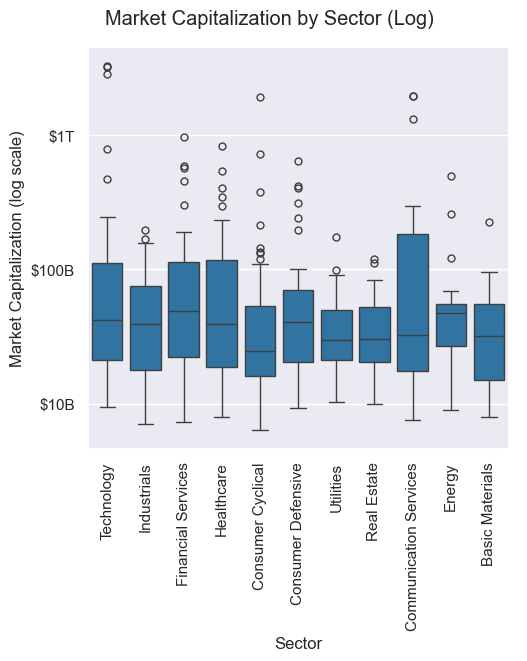

In [166]:
# Set plot style and context

# Create a box plot for Marketcap by Sector (log)
log_box = sns.catplot(x='Sector', y='Marketcap', data=companies, kind='box', 
                      order=sector_counts.index)
log_box.fig.suptitle('Market Capitalization by Sector (Log)', y=1.01)
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks([1e10, 1e11, 1e12], ['$10B', '$100B', '$1T']) 
log_box.set_axis_labels('Sector', 'Market Capitalization (log scale)')

Our data contains several companies with exceptionally high market cap values, which act as extreme outliers. To prevent these outliers from overwhelming our visualization, we’ve used a **logarithmic scale** for the y-axis in the box plot. While this helps create a more balanced view of the data, it can make smaller differences harder to detect. Now, let’s explore how the data appears on a **linear scale**, **excluding outliers** for a clearer comparison.

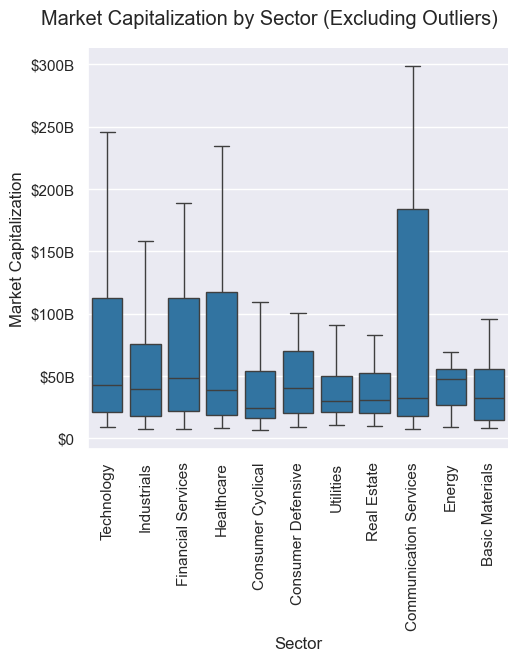

In [167]:
# Create a box plot for Marketcap by Sector (without outliers)
no_outliers_box = sns.catplot(x='Sector', y='Marketcap', data=companies, kind='box', 
                              order=sector_counts.index, showfliers=False)
no_outliers_box.fig.suptitle('Market Capitalization by Sector (Excluding Outliers)', y=1.01)
plt.yticks([0, 5e10, 1e11, 1.5e11, 2e11, 2.5e11, 3e11], 
           ['$0', '$50B', '$100B', '$150B', '$200B', '$250B', '$300B'])
plt.xticks(rotation=90)
no_outliers_box.set_axis_labels('Sector', 'Market Capitalization')

Now let's do some time series analysis of the `index` DataFrame. Let's create a line plot of the overall S&P 500 index value for all dates in our dataset (September 2014 - September 2024). In addition to the index values, let's also add a couple of trend lines. **The Smooth Moving Average (SMA)** is a commonly used technical indicator in stock analysis. It represents a rolling average by taking the mean of a the previous data points within a particular time frame. We will plot the SMA lines for the **90-day** and **200-day** time frames.

Earliest date:  2014-09-15 00:00:00
Most recent date:  2024-09-13 00:00:00


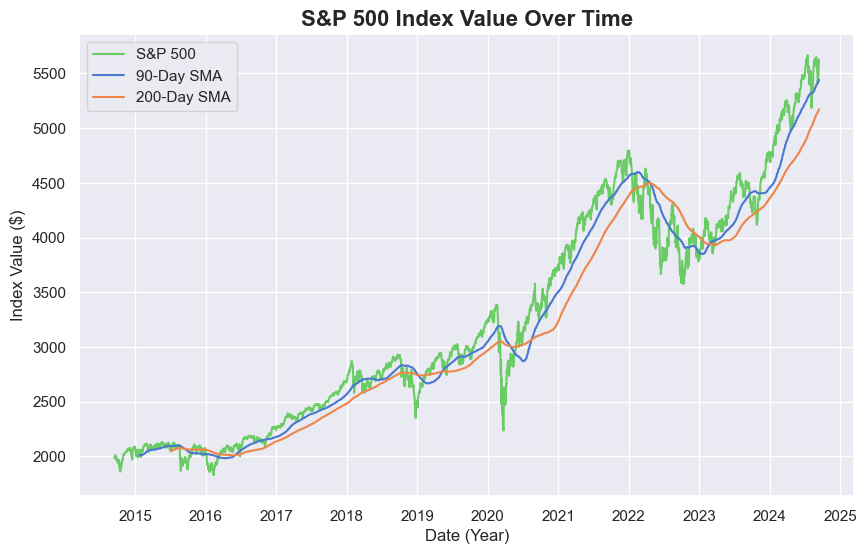

In [239]:
# Convert dates to datetime format/type
index['Date'] = pd.to_datetime(index['Date'])

# Print min and max dates for reference
print("Earliest date: ", index['Date'].min())
print("Most recent date: ", index['Date'].max())

# Create color palette 
colors = sns.color_palette('muted', 3)

# Create a line plot of the index value over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='S&P500', data=index, color=colors[2], label='S&P 500', lw=1.5)

# Calculate and add 90 and 200 day SMA columns to the index DataFrame
# Plot the SMAs on the same line plot
index['SMA_90'] = index['S&P500'].rolling(window=90).mean()
sns.lineplot(x='Date', y='SMA_90', data=index, color=colors[0], label='90-Day SMA', lw=1.5)
index['SMA_200'] = index['S&P500'].rolling(window=200).mean()
sns.lineplot(x='Date', y='SMA_200', data=index, color=colors[1], label='200-Day SMA', lw=1.5)

# Add title and label
plt.title('S&P 500 Index Value Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date (Year)')
plt.ylabel('Index Value ($)')
plt.show()

From our plot, we observe the overall trend is clearly upwards. The SMAs smooth out short-term fluctuations and highlight longer-term trends. For example, the index experienced a **sharp drop in 2020** due to the fallout of Covid-19. The 90-Day SMA minimizes this drop, and the drop is even less noticable in the 200-Day SMA. On the other hand, the more drawn out decline of the index in **2022** is still clearly depicted as a downward trend by both SMA lines.

Each year is divided into four quarters: **Q1** (January to March), **Q2** (April to June), **Q3** (July to September), and **Q4** (October to December). Historically, the S&P 500 tends to perform better in certain quarters, with Q4 often seeing the highest growth, largely driven by increased consumer spending during the holiday season. Let’s analyze our data to see if it reflects this trend.

In [169]:
# Add columns to 'index' indicating the quarter and year of each record
index['Quarter'] = index['Date'].dt.quarter
index['Year'] = index['Date'].dt.year

# Filter out incomplete quarters
index_q = index[(index['Date'] >= '2014-10-01') & 
                       (index['Date'] < '2024-09-01')]

# Group by Year and Quarter, taking the first and last S&P 500 values for each quarter
q_cumulative = index_q.groupby(['Year', 'Quarter']).agg(
    Start_Value=('S&P500', 'first'),
    End_Value=('S&P500', 'last')
).reset_index()

# Add a percent change column based on start and end values
q_cumulative['Percent_Change'] = (((q_cumulative['End_Value'] 
                                            - q_cumulative['Start_Value']) 
                                            / q_cumulative['Start_Value']) 
                                            * 100)

#print(q_cumulative)

# Find average percent change grouped by quarter
avg_q_performance = q_cumulative.groupby('Quarter').agg(
                    Avg_Percent_Change=('Percent_Change', 
                                        lambda x: round(x.mean(), 2))).reset_index()

print("Average S&P 500 performance by quarter (2014 Q4 to 2024 Q3):")
print(avg_q_performance)


Average S&P 500 performance by quarter (2014 Q4 to 2024 Q3):
   Quarter  Avg_Percent_Change
0        1                1.77
1        2                3.98
2        3                0.73
3        4                5.30


Our dataset confirms the typical trend: **Q4** saw the highest average percent growth (**5.30%**), with **Q2**, **Q1**, and **Q3** following in descending order. This order aligns with historical performance, where **Q4** generally leads, followed by the other quarters in the same sequence. Now, let's visualize this pattern.

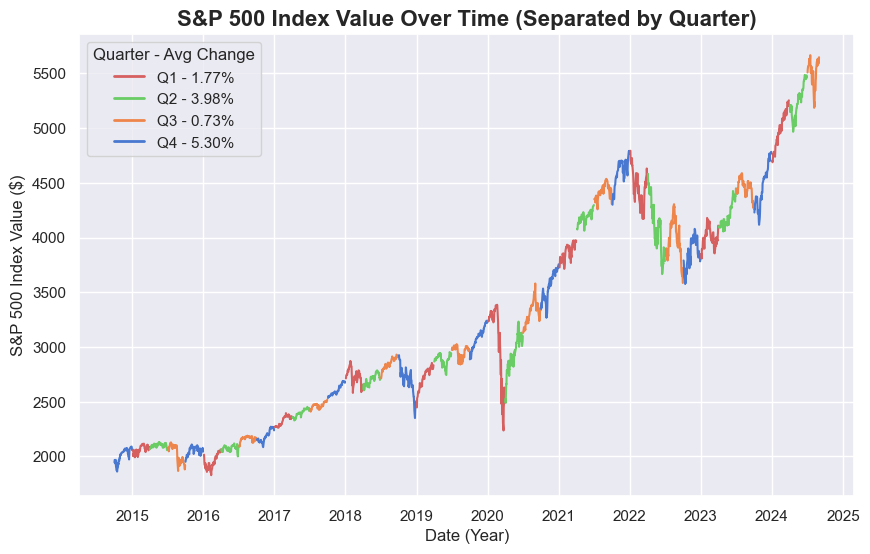

In [243]:
# Define a custom palette with a color for each quarter
quarter_palette = sns.color_palette('muted', 4)[::-1]

# Create a new figure
plt.figure(figsize=(10, 6))

# Group data by both Year and Quarter and plot each group separately
for (year, quarter), group in index_q.groupby([index_q['Year'], 'Quarter']):
    sns.lineplot(x='Date', y='S&P500', data=group, color=quarter_palette[quarter-1], legend=False)

# Set plot labels and title
plt.title('S&P 500 Index Value Over Time (Separated by Quarter)', fontsize=16, fontweight='bold')
plt.xlabel('Date (Year)')
plt.ylabel('S&P 500 Index Value ($)')

# Create a legend, include calculated avg percent change for reference
custom_legend = [plt.Line2D([0], [0], color=quarter_palette[q-1], lw=2) for q in range(1, 5)]
plt.legend(custom_legend, ['Q1 - 1.77%', 'Q2 - 3.98%', 'Q3 - 0.73%', 'Q4 - 5.30%'], 
           title='Quarter - Avg Change')
plt.show()

By separating the data by quarter, we can visually compare each quarter's performance over time.